## Linear Regression 

Linear Regression is one of the easiest algorithms in machine learning.

In this, we will establish a linear relationship between the input variables(X) and single output variable(Y). When the input(X) is a single variable this model is called **Simple Linear Regression** and when there are mutiple input variables(X), it is called **Multiple Linear Regression**.

For each problem you have to do the following:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test and validation set.

7.Build Model. 

8.Apply the model.

9.Evaluate the model.

10.Provide insights.


## Simple Linear Regression

In this problem we have an input variable - X and one output variable - Y. And we want to build linear relationship between these variables. 

## Problem Statement

Using Simple Linear Regression **predict the population** of different cities in dataset given their population 10 years back. Try to construct a relation for the increase in the population. 

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

## Question 1

*Read the dataset given in file named **'bigcity.csv'**.*

#### Answer:

In [37]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt   
import seaborn as sns

In [36]:
%matplotlib inline 

In [2]:
TG = pd.read_csv('bigcity.csv')

In [14]:
TG

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75
5,6,37,63
6,7,29,50
7,8,23,48
8,9,30,111
9,10,2,50


## Question 2 - Transform the dataset

*Find the number of records in given dataset and separate the input and target variables into new variables with names **X** and **Y**.*

#### Answer:

In [7]:
TG.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,49.0,25.000000,14.288690,1.0,13.0,25.0,37.0,49.0
u,49.0,103.142857,104.405061,2.0,43.0,64.0,120.0,507.0
x,49.0,127.795918,123.121211,46.0,58.0,79.0,130.0,634.0


In [13]:
TG.dtypes

Unnamed: 0    int64
u             int64
x             int64
dtype: object

In [15]:
TG = TG.drop('Unnamed: 0', axis=1)

In [21]:
TG.columns = ['1920','1930']
TG.head()

,1920,1930
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


In [22]:
X = TG.drop('1930', axis=1)
X.head()

,1920
0,138
1,93
2,61
3,179
4,48


In [23]:
Y = TG.drop('1920', axis=1)
Y.head()

,1930
0,143
1,104
2,69
3,260
4,75


## Question 3 - Split data into train, test sets

*Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

#### Answer:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [31]:
Y_test.shape

(10, 1)

In [32]:
Y_train.shape

(39, 1)

In [33]:
X_test.shape

(10, 1)

In [34]:
X_train.shape

(39, 1)

## Question 4 - Model

*Estimate the coefficients b0 and b1 using **scikit-learn**.* 

#### Answer:

In [39]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient b1 for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient b1 for 1920 is 1.1594512342174779


In [42]:
intercept = regression_model.intercept_[0]

print("The intercept b0 for our model is {}".format(intercept))

The intercept b0 for our model is 9.718455322828262


## Question 5 - Linear Relationship between feature and target

*Plot the line with b1 and b0 as slope and y-intercept.*

#### Answer:

## Question 6 - Predict population

Apply the model on the test set and compare the Actual and Predicted values.

#### Answer:

In [45]:
regression_model.score(X_test, Y_test)

0.9181922560396981

In [ ]:
# The model explains 91.8% of the variability in Y using X

In [46]:
Y_pred = regression_model.predict(X_test)

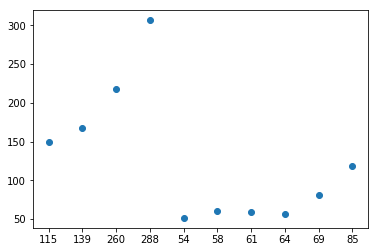

In [47]:
plt.scatter(Y_test, Y_pred)

## Question 7 - Evaluation of model with scikit-learn

*Validate the model with Root Mean Squares error and R^2 score using scikit-learn.*

#### Answer:

## Question 8 - Model [Bonus]

*Estimate the parameters(coefficients of the model) **b1** and **b0** in **Ordinary Least square method**.*

#### Answer:

## Question 9 - Evaluation [Bonus]

*Calculate error using **Root Mean Squares** method.*

#### Answer:

## Question 10

*Give your understanding on RMSE, SS_t, SS_r, R-Square scores.*

In [ ]:
#RMSE
    #This is Root Mean Square Error. It is used to measure the variances betwen model predicted values and observed values. 
    #RMSE is used to compare forecasting errors of different models for a particular dataset and not between datasets, as it is scale-dependent.
    #RMSE is always non-negative, and a value of 0 (never achieved in practice) would indicate a perfect fit to the data.
#SSR
    #The Sum of Squares Regression (SSR) is the sum of the squared differences between the prediction for each observation and the population mean.
#SST
    #The Total Sum of Squares (SST) is equal to SSR + SSE.
    #SSR =  ∑ ( y – y )    (measure of explained variation)
    #SSE =  ∑ ( y – y )     (measure of unexplained variation) 
    #SST = SSR + SSE = ∑ ( y – y )  (measure of total variation in y)
#R-Square
    #The proportion of total variation (SST) that is explained by the regression (SSR)  
    #is known as the Coefficient of Determination, and is often referred to as R-square  

## Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      index;
      petrol tax;
      per capita income;
      number of miles of paved highway;
      proportion of drivers;
      the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

#### Answer:

In [57]:
fuel = pd.read_csv('petrol.csv')
print(fuel.head())
print ("--------------------------")
fuel.describe().transpose()

   tax   income   highway     dl   consumption
0  9.0     3571      1976  0.525           541
1  9.0     4092      1250  0.572           524
2  9.0     3865      1586  0.580           561
3  7.5     4870      2351  0.529           414
4  8.0     4399       431  0.544           410
--------------------------


,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


*Plot the scatter matrix to understand the distributions of each varible and its asscociation with other variables.*

#### Answer:

In [60]:
# Let us do a correlation analysis among the different dimensions and also each dimension with the dependent dimension
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 

fuel_attr = fuel.iloc[:, 0:5]
fuel_attr


,tax,income,highway,dl,consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


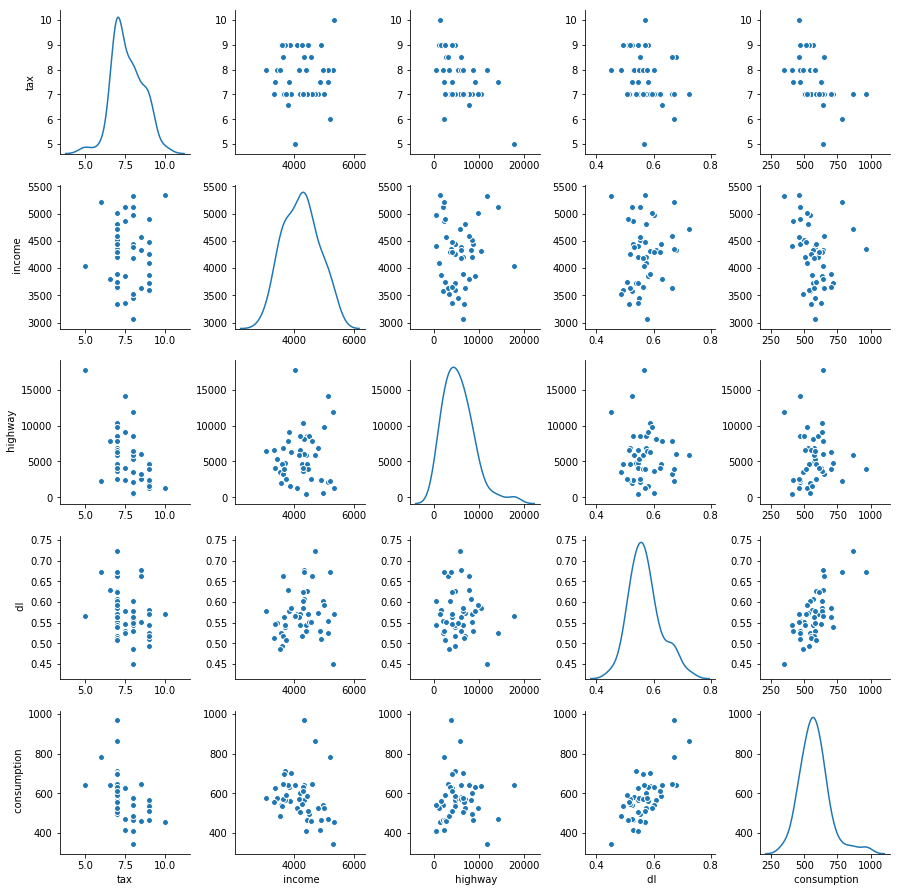

In [61]:
#axes = pd.plotting.scatter_matrix(mpg_df_attr)
#plt.tight_layout()
#plt.savefig('d:\greatlakes\mpg_pairpanel.png')

sns.pairplot(fuel_attr, diag_kind='kde')   # to plot density curve instead of histogram

#sns.pairplot(mpg_df_attr)  # to plot histogram, the default

## Question 2 - Drop outliers

Find the outliers and drop such records(consider a value is outlier if its > 1.5*IQR).

#### Answer:

## Question 3 - Independent variables and collinearity

Which attributes seems to have stronger association with the dependent variable **consumption**?

#### Answer:

## Selecting features based on correlation values

#### *i) Perform regression without highway and income features.*

## Question 4 - Transform the dataset

*Divide the data into feature(X) and target(Y) sets (without highway and income features).*

#### Answer:



## Question 5 - Split data into train, test sets

*Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

#### Answer:

## Question 6 - Build Model

*Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns.*

#### Answer:

## Question 7 - Apply the model (Predict the petrol consumption)

*Compare the predicted values by the model with the actual values. Calculate predictions for X_test and store in y_pred variable. Construct and display a dataframe with y_test and y_pred as columns.*

#### Answer:

## R-Square and Adjusted R-Square

## Question 8 - Evaluate the model

*Calculate R-Square and adjusted R-Square scores for the above model.*

#### Answer:

## Question 9

#### ii) Repeat 4,5,6,8 questions by adding **'income'** feature.

#### Answer:

## Question 10

#### ii) Repeat 4,5,6,8 questions by adding **' highway'** feature.

#### Answer:

## Question 11

#### ii) Repeat 4,5,6,8 questions by adding both **'highway'** and **'income'** feature.

#### Answer:

## Question 12

*In one or two sentences give reasoning on R-Square and Adjusted R-Square scores based on the above scores in 9,10,11 questions.*

#### Answer:

## Question 13 - Final insights.

*In one or two sentences give your understanding on the coefficients for each input feature [ How much prominence each variable has in consumption of petrol ].*

#### Answer: